In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Import statements

In [2]:
import pandas as pd
from ebmdatalab.maps import MapLoader

### Preparing the data

In [3]:
ccg = 'ccg_list_size.json'
df = pd.read_json(ccg)
mask = (df['date'] == '2014-05-01')
df = df.loc[mask]
df['group'] = pd.qcut(df.total_list_size, q=5,
                     labels=["A", "B", "C", "D", "E"])

### Paths to the reference files

In [4]:
MAP_DATA = "ccgs_2020.json"
CCG_INDEX = "ccg_for_map.csv"

### Create MapLoader object and assign to variable name
In this case - test

In [5]:
test = MapLoader()

### Load the dataframe and point to the paths of the reference files 

In [6]:
test.load_data(data=df, mapping_data_path=MAP_DATA, index_file_path=CCG_INDEX)

### There are inbuilt attributes such as author and date/time created

In [7]:
test.author

'EBM DataLab'

In [8]:
test.date

datetime.datetime(2019, 9, 17, 9, 18, 22, 208241)

### This creates a dataframe that becomes an attribute. It can then be changed and manipulated like any other dataframe file

In [9]:
test.final_df.head()

,date,row_id,row_name,total_list_size,group,code_x,name_x,is_london,org_type,code_y,name_y,ons_code,geometry
0,2014-05-01,00C,NHS DARLINGTON CCG,106387,A,00C,NHS DARLINGTON CCG,False,CCG,00C,NHS DARLINGTON CCG,None,"POLYGON ((-1.43833114004644 54.595081726582, -..."
1,2014-05-01,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",288102,D,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",False,CCG,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",None,"POLYGON ((-1.95239926157069 54.8542539333466, ..."
2,2014-05-01,00J,NHS NORTH DURHAM CCG,251133,C,00J,NHS NORTH DURHAM CCG,False,CCG,00J,NHS NORTH DURHAM CCG,None,"POLYGON ((-1.55938644087383 54.8820482099968, ..."
3,2014-05-01,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,292306,D,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,False,CCG,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,None,"POLYGON ((-1.2421999077741 54.7229673286429, -..."
4,2014-05-01,00L,NHS NORTHUMBERLAND CCG,321223,D,00L,NHS NORTHUMBERLAND CCG,False,CCG,00L,NHS NORTHUMBERLAND CCG,None,"(POLYGON ((-2.03440706545527 55.8111309460721,..."


In [10]:
test.final_df.drop(columns=["code_x", "name_x", "code_y", "ons_code", "name_y"], axis=1, inplace=True)

In [12]:
test.final_df.head()

,date,row_id,row_name,total_list_size,group,is_london,org_type,geometry
0,2014-05-01,00C,NHS DARLINGTON CCG,106387,A,False,CCG,"POLYGON ((-1.43833114004644 54.595081726582, -..."
1,2014-05-01,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",288102,D,False,CCG,"POLYGON ((-1.95239926157069 54.8542539333466, ..."
2,2014-05-01,00J,NHS NORTH DURHAM CCG,251133,C,False,CCG,"POLYGON ((-1.55938644087383 54.8820482099968, ..."
3,2014-05-01,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,292306,D,False,CCG,"POLYGON ((-1.2421999077741 54.7229673286429, -..."
4,2014-05-01,00L,NHS NORTHUMBERLAND CCG,321223,D,False,CCG,"(POLYGON ((-2.03440706545527 55.8111309460721,..."


In [13]:
test.final_df['total_list_size'].max()

1249011

In [14]:
round(test.final_df['total_list_size'].mean())

295573

In [15]:
test.final_df['total_list_size'].max()
round(test.final_df['total_list_size'].mean())

295573

### We can create plots by using the create_map() method. This works similarly to a function.

It requires a plot_value and a title. 

There are a number of optional arguments which are the same as the plot() optional arguments, such as cmap and legend. If left blank, these are set as standard EBM Datalab values. 

In addition there are number of specific argument for datalab project. 
- fit_legend (True/False) which allows the legend to be scaled to the map
- london_separate (True/False) which allows london to be put next to the rest of england on the map
- description (str) - this is a string which describes the map and forms a key for saving. This must be filled in in order to save the plot 
- save (True/False) - if true, this saves the plot into a dictionary that is attribute of MapLoader. This can be access by test.plots[key]. 

In [16]:
plot = test.create_map(plot_value="group", title='list size in categories')

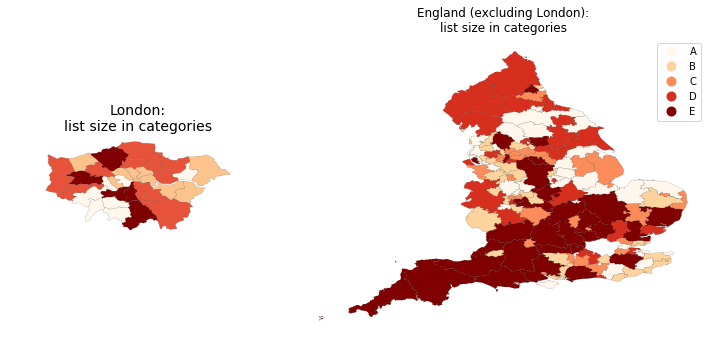

In [17]:
plot

### Maps can be created and changed from standard by overwriting the optional arguments such as cmap

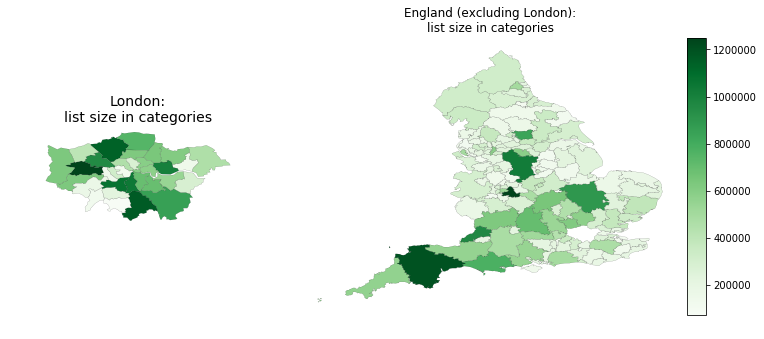

In [18]:
test.create_map(plot_value="total_list_size", title='list size in categories', fit_legend=True, cmap="Greens")

### Maps can be saved as part of the MapLoader object for later. This means the data or map does not need to be recreated. 

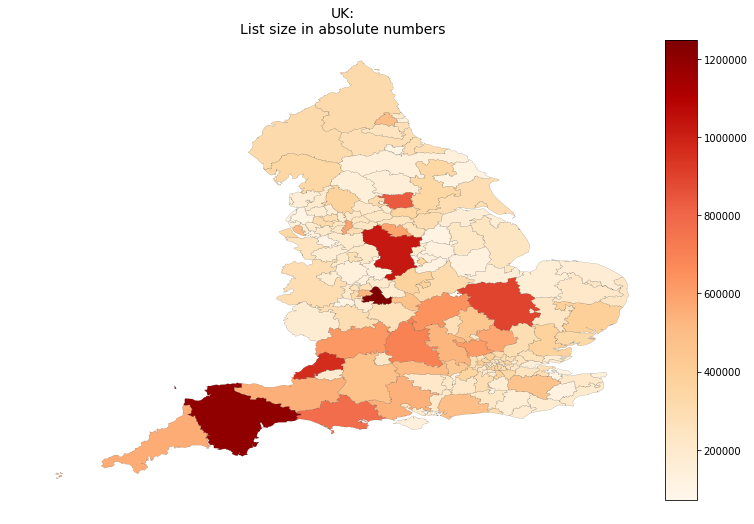

In [19]:
test.create_map(plot_value="total_list_size", title="List size in absolute numbers", description="List size May 2014", fit_legend=True, save="True", london_separate=False)